<a href="https://colab.research.google.com/github/VilchisKarla/SIMULACION-I/blob/main/INVENTARIOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulación de un Sistema de Inventario**


Distribución de demanda mensual empírica.

Tiempo de entrega dado por la siguiente función de proba
$$Meses: \qquad 1 \qquad 2\qquad 3$$
$$Probabilidad: 0.3 \quad 0.4 \quad 0.3$$

Distintos factores estacionales

**Costos:**


*   Costo de ordenar: $100/orden

*   Costo de inventario: $20/unidad/año

*   Costo de faltante:$50/unidad

Se asume una cantidad inicial de 150 unidades.

Determinar la cantidad óptima a ordenar **q** y el nivel óptimo de reorden **R**

Los valores de las variables de decisión para esta simulación son q=200 y R=100

**Nota:** Se utilizo tranformada inversa para calcular la simualción de las demandas y tiempos de entrega.


### Librerías a utilizar

In [1]:
import numpy as np
import random #Generar los datos de la demanda y el tiempo de entrega
import pandas as pd #Se utilizará para manejar mejor los datos en tablas
import matplotlib.pyplot as plt

### Distribución de la demanda

In [2]:
#función de densidad de probabilidad para la demanda
def demanda():
    r=random.random()
    rangos_r = {
        (0.000, 0.010): 35,
        (0.010, 0.025): 36,
        (0.025, 0.045): 37,
        (0.045, 0.065): 38,
        (0.065, 0.087): 39,
        (0.087, 0.110): 40,
        (0.110, 0.135): 41,
        (0.135, 0.162): 42,
        (0.162, 0.190): 43,
        (0.190, 0.219): 44,
        (0.219, 0.254): 45,
        (0.254, 0.299): 46,
        (0.299, 0.359): 47,
        (0.359, 0.424): 48,
        (0.424, 0.494): 49,
        (0.494, 0.574): 50,
        (0.574, 0.649): 51,
        (0.649, 0.719): 52,
        (0.719, 0.784): 53,
        (0.784, 0.844): 54,
        (0.844, 0.894): 55,
        (0.894, 0.934): 56,
        (0.934, 0.964): 57,
        (0.964, 0.980): 58,
        (0.980, 0.995): 59,
        (0.995, 1.000): 60,
    }
    va = None #Valor asignado
    for rp, qd in rangos_r.items():#numero aleatorio generado, cantidad demandada en el rango de r
        frontera_baja = rp[0]
        frontera_alta = rp[1]

        # checa si el valor de la propabilidad coincide con el valor dado
        if frontera_baja <= r < frontera_alta:
            va = qd
            break #termina de buscar cuando ya se encontó el valor de la demanda
    return va

### Distribución de tiempo de entrega

In [3]:
# Distribución de tiempo de entrega
def t():
  r = random.random()
  if r < 0.3: return 1
  elif 0.03 <= r and r < 0.7: return 2
  else: return 3

### Datos del problema

In [53]:
# Factores estacionales por mes (1-12)
factores_estacionales = {
    1: 1.20, 2: 1.00, 3: 0.90, 4: 0.80, 5: 0.80, 6: 0.70,
    7: 0.80, 8: 0.90, 9: 1.00, 10: 1.20, 11: 1.30, 12: 1.40
}

nombres_meses = {
    1: "Ene", 2: "Feb", 3: "Mar", 4: "Abr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Ago", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dic"
}

In [7]:
# Parámetros del sistema
costo_ordenar = 100  # $/orden
costo_inventario = 20 / 12  # $/unidad/mes
costo_faltante = 50  # $/unidad
i0 = 150
q=200
R=100

### Simulación

In [61]:
#Simulación del inventario en un año
def simular_1a(q, R):

    inventario = i0 #inventario inicial
    orden_pendiente = False #Verificar que no haya orden pendiente
    mes_llegada = None #No hay datos de cuando llega una orden al iniciar la simulación
    registros = []#aquí se almacenarán los datos obtenidos

    #Variables para los costos acumulados
    c_ordenar_anual = 0
    c_inventario_anual = 0
    c_faltante_anual = 0

    for mes in range(1,13):
        #Checar si hay ordenes pendientes
        if orden_pendiente and mes == mes_llegada:
            inventario += q
            orden_pendiente = False

        #demanda ajustada
        demanda_base = demanda() #Generar la demanda del mes correspondiente
        demanda_ajustada = round(demanda_base * factores_estacionales[mes]) #se hace el ajuste por estacionalidad
        inventario_inicial = inventario

        # Cálculo del faltante
        inventario -= demanda_ajustada
        faltante = max(0, -inventario)

        #Faltantes
        if inventario < 0:
            inventario = 0

        #Inventario promedio del mes
        inv_prom = (inventario_inicial + inventario) / 2


        #costos del mes
        costo_inv_mes = inv_prom * costo_inventario
        costo_faltante_mes = faltante * costo_faltante
        costo_orden_mes = 0

        #Agregar una orden cuando el inventario está por debajo del nivel de reorden R y no hay alguna orden pendiente en camino
        if inventario <= R and not orden_pendiente:
            tiempo_entrega = t()
            mes_llegada = mes + tiempo_entrega
            orden_pendiente = True
            costo_orden_mes = costo_ordenar

        #Resultados agregados al registro por mes
        registros.append({
            'Mes': nombres_meses[mes],
            'Inventario Inicial': inventario_inicial,
            'Demanda Base': demanda_base,
            'Demanda Ajustada': demanda_ajustada,
            'Inventario Final': inventario,
            'Faltante': faltante,
            'Orden Colocada': 1 if costo_orden_mes > 0 else 0,
            'Costo Orden': costo_orden_mes,
            'Costo Inventario': costo_inv_mes,
            'Costo Faltante': costo_faltante_mes
        })

        # Costos anuales del inventario
        c_ordenar_anual += costo_orden_mes
        c_inventario_anual += costo_inv_mes
        c_faltante_anual += costo_faltante_mes

    #Costo Final de tener el inventario trabajando un año
    costo_total_anual = c_ordenar_anual + c_inventario_anual + c_faltante_anual
    registros = pd.DataFrame(registros)
    return registros, c_ordenar_anual, c_inventario_anual, c_faltante_anual, costo_total_anual

#Asignar una variable a cada dato que regresa la función simular_1a con q=200 y r=100
Datos, costo_ordenar_anual, costo_inventario_anual, costo_faltante_anual, costo_total_anual= simular_1a(q, R)

#determinamos  un tamaño a la tabla de los datos que se mostrarán
pd.set_option('display.width', 1000)

#Imprimimos los datos de cada mes
display(Datos)
#obtenemos el promedio de las unidades en el inventario.
promedio_inventario = Datos['Inventario Inicial'].mean()
#imprimimos los costos del año
print(f"Promedio de inventario: {round(promedio_inventario)}")
print('Costo Ordenar Anual', costo_ordenar_anual)
print('Costo Inventario Anual', costo_inventario_anual)
print('Costo Faltante Anual', costo_faltante_anual)
print('Costo Total Anual', costo_total_anual)

,Mes,Inventario Inicial,Demanda Base,Demanda Ajustada,Inventario Final,Faltante,Orden Colocada,Costo Orden,Costo Inventario,Costo Faltante
0,Ene,150,45,54,96,0,1,100,205.000000,0
1,Feb,96,51,51,45,0,0,0,117.500000,0
2,Mar,45,46,41,4,0,0,0,40.833333,0
3,Abr,204,49,39,165,0,0,0,307.500000,0
4,May,165,42,34,131,0,0,0,246.666667,0
5,Jun,131,55,38,93,0,1,100,186.666667,0
6,Jul,293,53,42,251,0,0,0,453.333333,0
7,Ago,251,57,51,200,0,0,0,375.833333,0
8,Sep,200,45,45,155,0,0,0,295.833333,0
9,Oct,155,56,67,88,0,1,100,202.500000,0


Promedio de inventario inicial: 183
Costo Ordenar Anual 300
Costo Inventario Anual 3165.8333333333335
Costo Faltante Anual 0
Costo Total Anual 3465.8333333333335


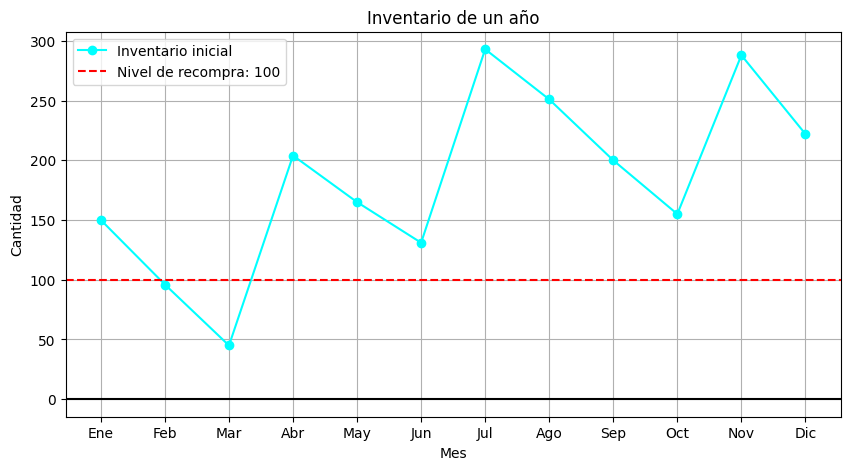

In [62]:
Mes = Datos['Mes']
plt.figure(figsize=(10, 5))
plt.plot(list(Datos["Inventario Inicial"]), marker = "o", label = "Inventario inicial", color ="cyan")
plt.axhline(y = R, color = "r", linestyle = "--", label = f"Nivel de recompra: {R}")
plt.axhline(y = 0, color = "k")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.title("Inventario de un año")
plt.legend(loc = "best")
plt.grid(True)
plt.xticks(range(12), Mes)
plt.show()

In [63]:
def simulacion_multiple(n, q, R):
    # Listas para almacenar resultados de cada simulación
    resultados_totales = []
    costos_ordenar = []
    costos_inventario = []
    costos_faltante = []
    costos_totales = []
    promedios_inventario = []

    for _ in range(n):
        # Ejecutar simulación
        datos, co, ci, cf, ct = simular_1a(q, R)

        # Calcular promedio de inventario inicial
        promedio_inv = datos['Inventario Inicial'].mean()

        # Almacenar resultados
        resultados_totales.append(datos)
        costos_ordenar.append(co)
        costos_inventario.append(ci)
        costos_faltante.append(cf)
        costos_totales.append(ct)
        promedios_inventario.append(promedio_inv)

    # Crear DataFrame con estadísticas resumidas
    resumen = pd.DataFrame({
        'Simulación': range(1, n+1),
        'Costo_Ordenar': costos_ordenar,
        'Costo_Inventario': costos_inventario,
        'Costo_Faltante': costos_faltante,
        'Costo_Total': costos_totales,
        'Promedio_Inventario': promedios_inventario
    })

    # Calcular estadísticas descriptivas
    estadisticas = resumen.describe().loc[['mean', 'std', 'min', 'max']]

    return resumen, estadisticas, resultados_totales

#Simulación para 100 años
n_simulaciones = 100  # Número de simulaciones que deseas ejecutar
resumen, estadisticas, todos_resultados = simulacion_multiple(n_simulaciones, q, R)


print("\nEstadísticas clave de las simulaciones:")
display(estadisticas)

# Si se desea ver la simulación de detrminado año.
simulacion_a_ver = 1  #Año 1
print(f"\nDetalles de la simulación #{simulacion_a_ver}:")
display(todos_resultados[simulacion_a_ver-1])




Estadísticas clave de las simulaciones:


,Simulación,Costo_Ordenar,Costo_Inventario,Costo_Faltante,Costo_Total,Promedio_Inventario
mean,50.500000,300.0,2664.725000,913.000000,3877.725000,156.765000
std,29.011492,0.0,452.131488,928.358495,787.771205,23.073859
min,1.000000,300.0,1760.000000,0.000000,2621.666667,110.916667
max,100.000000,300.0,3984.166667,3250.000000,5885.000000,222.833333



Detalles de la simulación #1:


,Mes,Inventario Inicial,Demanda Base,Demanda Ajustada,Inventario Final,Faltante,Orden Colocada,Costo Orden,Costo Inventario,Costo Faltante
0,Ene,150,51,61,89,0,1,100,199.166667,0
1,Feb,289,49,49,240,0,0,0,440.833333,0
2,Mar,240,51,46,194,0,0,0,361.666667,0
3,Abr,194,47,38,156,0,0,0,291.666667,0
4,May,156,42,34,122,0,0,0,231.666667,0
5,Jun,122,51,36,86,0,1,100,173.333333,0
6,Jul,86,52,42,44,0,0,0,108.333333,0
7,Ago,244,47,42,202,0,0,0,371.666667,0
8,Sep,202,48,48,154,0,0,0,296.666667,0
9,Oct,154,47,56,98,0,1,100,210.000000,0


In [75]:
import numpy as np
from scipy.optimize import minimize
import random

#calcular estadísticas de la demanda y los tiempos de entrega (empíricamente)
def calcular_estadisticas(n_muestras=10000):
    demandas = [demanda() for _ in range(n_muestras)]
    lead_times = [t() for _ in range(n_muestras)]
    return np.mean(demandas), np.std(demandas), np.max(demandas), np.mean(lead_times), np.max(lead_times)

demanda_media, demanda_std, demanda_max, lead_time_medio, lead_time_max = calcular_estadisticas()

print(f"Media de demanda: {demanda_media:.2f}")
print(f"Desviación estándar: {demanda_std:.2f}")
print(f"Demanda máxima esperada 99.9% (Percentil): {demanda_max}")
print(f"Tiempo de entrega medio: {lead_time_medio:.2f}")
print(f"Tiempo de entrega máximo: {lead_time_max}")

#Parámetros del sistema
R_min = int(demanda_max * lead_time_max)  # Máxima demanda posible en el peor "tiempo de entrega"
costo_ordenar = 100  # Costo por orden
costo_inventario = 20/12  # Costo de mantener por unidad/mes

#Función de costo total para optimizar q (dado R=R_min)
def costo_total(q, R_fijo, n_simulaciones=30):
    q = int(max(1, q))
    costos = []
    for _ in range(n_simulaciones):
        _, costo_orden, costo_inv, _, costo_total = simular_1a(q, R_fijo)
        costos.append(costo_total)
    return np.mean(costos)

#Optimizar q
resultado = minimize(
    lambda q: costo_total(q, R_min),
    x0=100,
    bounds=[(1, 500)],
    method='L-BFGS-B' #optimiza q y R dentro de los límites que se definen, asegurando que la solución sea realista.
)

q_optimo = int(resultado.x[0])
costo_optimo = resultado.fun

#Resultados óptimos
print("\n--- Sistema Óptimo ---")
print(f"Cantidad de pedido (q): {q_optimo}")
print(f"Punto de reorden (R): {R_min} (basado en percentil 99.9%)")
print(f"Costo total anual mínimo: {costo_optimo:.2f}")

#Validación con simulación
print("\nValidación con simulación:")
datos, co, ci, cf, ct = simular_1a(q_optimo, R_min)
print(f"Faltantes totales: {datos['Faltante'].sum()}")
print(f"Costos anuales -> Ordenar: {co}, Inventario: {ci}, Faltante: {cf}, Total: {ct}")

Media de demanda: 48.77
Desviación estándar: 5.66
Demanda máxima esperada 99.9% (Percentil): 60
Tiempo de entrega medio: 2.01
Tiempo de entrega máximo: 3


<ipython-input-75-1456957308>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  q = int(max(1, q))



--- Sistema Óptimo ---
Cantidad de pedido (q): 100
Punto de reorden (R): 180 (basado en percentil 99.9%)
Costo total anual mínimo: 3636.42

Validación con simulación:
Faltantes totales: 0
Costos anuales -> Ordenar: 600, Inventario: 2950.0, Faltante: 0, Total: 3550.0
